# Board Detection and Edge Detection

For the Peak Renewables project, the images of the wooden boards will be obtained from above the conveyor, where one of the face grains will be exposed to the image. This face grain is our region of interest (ROI).

Rather than trying to detect the defects on the original image consisting of background noise and a larger image size overall, it is pertinent to crop the image and upscale in order to eliminate the background around the wooden board. 

Firstly, we must import the required modules.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

Then I read the image. By default, it is BGR format. To display the image in RGB format, I need to convert it to BGR.

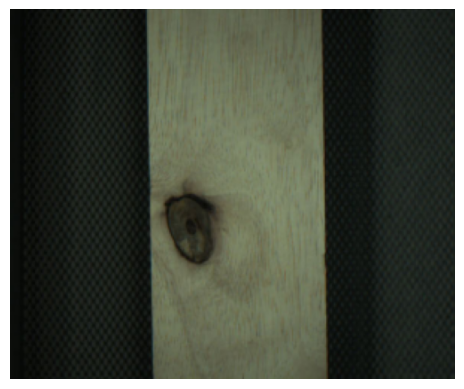

In [2]:
src_img = cv2.imread('../images/board_in_conveyor.png') #read the image

#image is in BGR format, so convert it to RGB format
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

I then convert it from BGR to Grayscale. This reduces the image from 3 channels that represent colour to 1 channel that represents intensity.

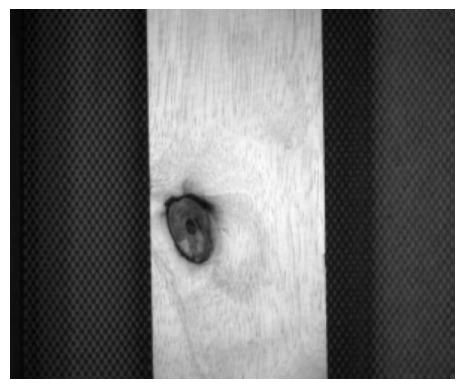

In [3]:
img_gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY) #convert to grayscale

plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.show()

I then need to convert the image to binary. This is done with the threshold function which essentially takes in a threshold value and approximation method.

If pixels fall below the threshold, they are converted to black, and if they are above the threshold, they are converted to white.

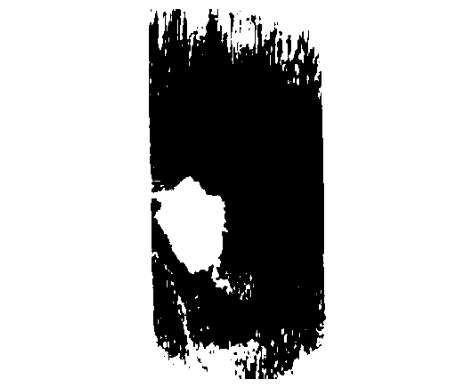

In [4]:
__, thresh = cv2.threshold(img_gray, 100, 255, cv2.CHAIN_APPROX_NONE)

plt.axis('off')
plt.imshow(thresh, cmap='gray')
plt.show()

Next is to use the findContours function to obtain point vectors of all the contours in the image.

A contour is a curve joining all the continuous points along a boundary which have the same color or intensity. 

#### How the find contours function works

The findContours function has 3 parameters. The source image, the contour retrieval mode, and the contour approximation method. It returns the contours and hierarchy of the contours.

The **contour approximation method** just modifies the way boundary coordinates are stored. If you pass cv2.**CHAIN_APPROX_NONE**, every boundary point is stored. cv2.**CHAIN_APPROX_SIMPLE** saves memory by removing any redundant points and compresses the contour. (like just having the two end points of a line vs all the points on the line).

The **contour retrieval mode** specifies the how the hierarchy of the contours are saved. The hierarchy defines the relationships between each contour.

This function assumes that the object of interest is white and the background is black.

In [5]:
inverted_binary = ~thresh

#find contours
contours,hierarchy = cv2.findContours(inverted_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Where the arguments are (src, contour retrieval mode, contour approximation method)
contours

(array([[[257, 412]],
 
        [[257, 413]],
 
        [[258, 414]],
 
        [[258, 415]],
 
        [[259, 415]],
 
        [[259, 412]]], dtype=int32),
 array([[[316, 407]],
 
        [[316, 409]],
 
        [[317, 410]],
 
        [[317, 407]]], dtype=int32),
 array([[[253, 406]],
 
        [[253, 411]],
 
        [[254, 410]],
 
        [[254, 407]]], dtype=int32),
 array([[[201, 402]],
 
        [[201, 403]]], dtype=int32),
 array([[[216, 401]],
 
        [[216, 403]],
 
        [[217, 403]],
 
        [[218, 404]],
 
        [[219, 404]],
 
        [[221, 406]],
 
        [[221, 407]],
 
        [[221, 403]],
 
        [[220, 402]],
 
        [[217, 402]]], dtype=int32),
 array([[[183, 399]]], dtype=int32),
 array([[[248, 394]]], dtype=int32),
 array([[[270, 391]]], dtype=int32),
 array([[[210, 391]],
 
        [[210, 392]],
 
        [[211, 393]],
 
        [[211, 395]],
 
        [[213, 397]],
 
        [[214, 397]],
 
        [[213, 396]],
 
        [[213, 393]],
 
        

Below illustrates what exactly the contour vectors map to by using the drawContours function.

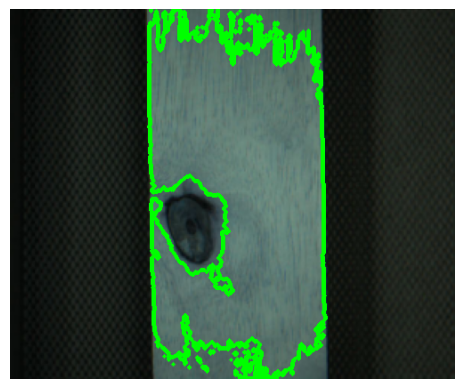

In [6]:
img_copy = src_img.copy()
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)

plt.axis('off')
plt.imshow(img_copy)
plt.show()

The BoundRect function will estimate a bounding box around a given contour.

In [7]:
largest = max(contours, key=cv2.contourArea)

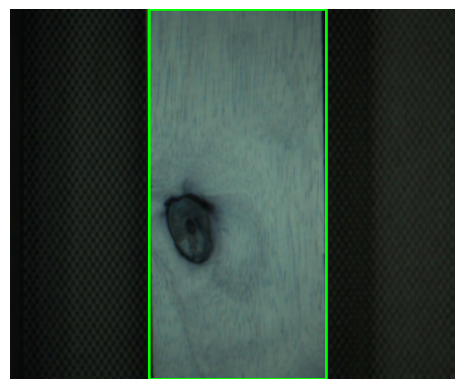

In [8]:

#Drawing a bounding box around the largest contour
x,y,w,h = cv2.boundingRect(largest)

cv2.rectangle(src_img,(x,y),(x+w,y+h),(0,255,0),2)
#params are (src, top-left vertex, bottom-right vertex, color, thickness)

plt.axis('off')
plt.imshow(src_img)
plt.show()

Now we can crop the image accordingly to the contour in the image. The image might not have a black background or might have defects caught in the contouring method, so we need a way to find the right contour. In this implementation, we are making the assumption that the largest contour should map to the board. 

Another issue that might arise is that the board might not be straight, so the cropping might not work properly. To counteract so, we find the angle of the contour and transform the image with cv2.warpAffine.

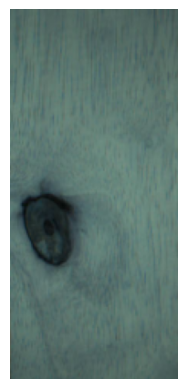

In [9]:
img_cropped = src_img[y+5:y+h-5, x+5:x+w-10] # cut 5 pixel from each side so no black on both sides

plt.axis('off')
plt.imshow(img_cropped)
plt.show()

Once we have more images, more testing is required to ensure that this method works reliably and accurately.